In [1]:
# Load required libraries
import pandas as pd
import pandas.tseries
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import seaborn as sns; sns.set()
from datetime import datetime
%matplotlib inline
import smopy

In [2]:
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')
df.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,536764362,06/01/2009,19:42:00,06/01/2009,19:43:00,25.0,06/09/2009,351,CRIMINAL MISCHIEF & RELATED OF,259.0,...,NaN,NaN,40.799622,-73.941872,"(40.79962153, -73.941872335)",PATROL BORO MAN NORTH,NaN,NaN,UNKNOWN,D
1,391832903,06/01/2009,18:00:00,06/09/2009,00:30:00,123.0,06/09/2009,365,ADMINISTRATIVE CODE,878.0,...,M,NaN,40.537226,-74.230616,"(40.537226396, -74.230615874)",PATROL BORO STATEN ISLAND,NaN,18-24,WHITE,F
2,362529055,06/01/2009,18:00:00,06/09/2009,10:00:00,109.0,06/09/2009,109,GRAND LARCENY,438.0,...,NaN,NaN,40.762929,-73.807415,"(40.76292907, -73.807415255)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,M
3,933294043,06/01/2009,15:30:00,06/01/2009,15:45:00,9.0,06/09/2009,344,ASSAULT 3 & RELATED OFFENSES,101.0,...,F,NaN,40.719465,-73.977372,"(40.719465473, -73.977371562)",PATROL BORO MAN SOUTH,NaN,<18,WHITE HISPANIC,F
4,176306023,06/01/2009,15:00:00,06/08/2009,15:00:00,52.0,06/09/2009,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,M,NaN,40.878106,-73.880984,"(40.878106453, -73.880984276)",PATROL BORO BRONX,NaN,18-24,WHITE HISPANIC,F


In [3]:
df.isnull().sum() 

CMPLNT_NUM                 0
CMPLNT_FR_DT             655
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1607101
CMPLNT_TO_TM         1602801
ADDR_PCT_CD             2166
RPT_DT                     0
KY_CD                      0
OFNS_DESC              18805
PD_CD                   5496
PD_DESC                 5496
CRM_ATPT_CPTD_CD           7
LAW_CAT_CD                 0
BORO_NM                10518
LOC_OF_OCCUR_DESC    1394809
PREM_TYP_DESC          37703
JURIS_DESC                 0
JURISDICTION_CODE       5496
PARKS_NM             6479911
HADEVELOPT           6177206
HOUSING_PSA          5998248
X_COORD_CD             17339
Y_COORD_CD             17339
SUSP_AGE_GROUP       4590963
SUSP_RACE            3222422
SUSP_SEX             3355736
TRANSIT_DISTRICT     6356760
Latitude               17339
Longitude              17339
Lat_Lon                17339
PATROL_BORO             5953
STATION_NAME         6356760
VIC_AGE_GROUP        1638441
VIC_RACE                 305
VIC_SEX       

In [4]:
print(df.shape)
print(df.columns)
print(df.info())

(6500870, 35)
Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500870 entries, 0 to 6500869
Data columns (total 35 columns):
CMPLNT_NUM           int64
CMPLNT_FR_DT         object
CMPLNT_FR_TM         object
CMPLNT_TO_DT         object
CMPLNT_TO_TM         object
ADDR_PCT_CD          float64
RPT_DT               object
KY_CD                int64
OFNS_DESC            object
PD_CD                float64
PD_DESC     

In [5]:
df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [6]:
df['OFNS_DESC'].shape

(6500870,)

In [7]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [8]:
df.OFNS_DESC.value_counts() 

PETIT LARCENY                           1072782
HARRASSMENT 2                            806647
ASSAULT 3 & RELATED OFFENSES             677723
CRIMINAL MISCHIEF & RELATED OF           650495
GRAND LARCENY                            560269
DANGEROUS DRUGS                          405399
OFF. AGNST PUB ORD SENSBLTY &            348231
FELONY ASSAULT                           244862
ROBBERY                                  239984
BURGLARY                                 228062
MISCELLANEOUS PENAL LAW                  158748
DANGEROUS WEAPONS                        150259
OFFENSES AGAINST PUBLIC ADMINI           124375
GRAND LARCENY OF MOTOR VEHICLE           119373
INTOXICATED & IMPAIRED DRIVING            89636
VEHICLE AND TRAFFIC LAWS                  78723
CRIMINAL TRESPASS                         76954
SEX CRIMES                                75342
THEFT-FRAUD                               70132
FORGERY                                   65794
FRAUDS                                  

In [9]:
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'],format = '%m/%d/%Y',errors='coerce')
df.index = df['CMPLNT_FR_DT']

In [10]:
df[df.CMPLNT_FR_DT.isnull()]

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
CMPLNT_FR_DT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaT,470335604,NaT,08:00:00,06/02/2009,08:05:00,7.0,06/02/2009,109,GRAND LARCENY,419.0,"LARCENY,GRAND FROM PERSON,UNCL",COMPLETED,FELONY,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,986987.0,199181.0,NaN,UNKNOWN,M,NaN,40.713390,-73.990129,"(40.713390372, -73.990128602)",PATROL BORO MAN SOUTH,NaN,25-44,ASIAN / PACIFIC ISLANDER,M
NaT,976864847,NaT,12:00:00,NaN,NaN,75.0,06/01/2009,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,DEPARTMENT STORE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1012384.0,185150.0,NaN,NaN,NaN,NaN,40.674834,-73.898576,"(40.674834241, -73.898575766)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
NaT,562100888,NaT,11:00:00,NaN,NaN,14.0,05/26/2009,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,MANHATTAN,INSIDE,COMMERCIAL BUILDING,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,990059.0,213667.0,NaN,UNKNOWN,NaN,NaN,40.753149,-73.979035,"(40.753149403, -73.97903485)",PATROL BORO MAN SOUTH,NaN,25-44,BLACK,F
NaT,705069454,NaT,08:00:00,04/10/2009,08:00:00,46.0,05/18/2009,341,PETIT LARCENY,321.0,"LARCENY,PETIT FROM AUTO",COMPLETED,MISDEMEANOR,BRONX,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1007938.0,250692.0,NaN,NaN,NaN,NaN,40.854743,-73.914373,"(40.854742994, -73.914373035)",PATROL BORO BRONX,NaN,45-64,BLACK,F
NaT,974246437,NaT,20:00:00,05/04/2009,10:00:00,88.0,05/13/2009,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",COMPLETED,MISDEMEANOR,BROOKLYN,FRONT OF,COMMERCIAL BUILDING,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,991197.0,192954.0,NaN,NaN,NaN,NaN,40.696296,-73.974949,"(40.696296417, -73.97494881)",PATROL BORO BKLYN NORTH,NaN,NaN,UNKNOWN,D
NaT,156922504,NaT,16:30:00,03/05/2009,16:35:00,122.0,04/01/2009,341,PETIT LARCENY,321.0,"LARCENY,PETIT FROM AUTO",COMPLETED,MISDEMEANOR,STATEN ISLAND,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,947733.0,148400.0,NaN,UNKNOWN,M,NaN,40.573933,-74.131450,"(40.573932675, -74.131449758)",PATROL BORO STATEN ISLAND,NaN,25-44,ASIAN / PACIFIC ISLANDER,M
NaT,650965681,NaT,13:30:00,03/31/2009,14:15:00,14.0,03/31/2009,109,GRAND LARCENY,438.0,"LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UN...",COMPLETED,FELONY,MANHATTAN,INSIDE,CLOTHING/BOUTIQUE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,987873.0,212315.0,NaN,BLACK,NaN,NaN,40.749440,-73.986926,"(40.74943967, -73.986925574)",PATROL BORO MAN SOUTH,NaN,45-64,WHITE,F
NaT,133747123,NaT,13:00:00,02/19/2009,14:30:00,110.0,03/27/2009,233,SEX CRIMES,175.0,"SEXUAL ABUSE 3,2",COMPLETED,MISDEMEANOR,QUEENS,INSIDE,OTHER,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1020255.0,210816.0,<18,WHITE HISPANIC,M,NaN,40.745253,-73.870063,"(40.745252741, -73.87006287)",PATROL BORO QUEENS NORTH,NaN,<18,WHITE,F
NaT,470781379,NaT,00:01:00,12/31/2007,24:00:00,62.0,03/26/2009,112,THEFT-FRAUD,739.0,"FRAUD,UNCLASSIFIED-FELONY",COMPLETED,FELONY,BROOKLYN,INSIDE,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,986228.0,156806.0,NaN,NaN,NaN,NaN,40.597080,-73.992879,"(40.597080466, -73.992878872)",PATROL BORO BKLYN SOUTH,NaN,18-24,WHITE,M


In [11]:
df.dropna(subset=['CMPLNT_FR_DT'], inplace=True)

In [12]:
crimes_wanted = ['GRAND LARCENY','PETIT LARCENY', 'ROBBERY', 'BURGLARY', 'GRAND LARCENY OF MOTOR VEHICLE','DANGEROUS DRUGS' ]

In [13]:
df_crimes = df.loc[df['OFNS_DESC'].isin(crimes_wanted)]

In [14]:
df_crimes.OFNS_DESC.value_counts()


PETIT LARCENY                     1072646
GRAND LARCENY                      560167
DANGEROUS DRUGS                    405394
ROBBERY                            239962
BURGLARY                           228029
GRAND LARCENY OF MOTOR VEHICLE     119352
Name: OFNS_DESC, dtype: int64

In [15]:
df_crimes['CMPLNT_FR_DT'] = pd.to_datetime(
    df_crimes['CMPLNT_FR_DT'], errors='coerce', infer_datetime_format = True)




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df.index 

DatetimeIndex(['2009-06-01', '2009-06-01', '2009-06-01', '2009-06-01',
               '2009-06-01', '2009-06-01', '2009-06-01', '2009-06-01',
               '2009-06-01', '2009-06-01',
               ...
               '2009-06-03', '2009-06-03', '2009-06-03', '2009-06-02',
               '2009-06-02', '2009-06-02', '2009-06-02', '2009-06-02',
               '2009-06-01', '2009-06-01'],
              dtype='datetime64[ns]', name='CMPLNT_FR_DT', length=6500119, freq=None)

In [18]:
df_date = df_crimes.copy()

In [ ]:
df_date

In [21]:
df_monthly = df_date.resample('MS')

month_count = df_monthly.size()
month_count = pd.DataFrame(month_count)
month_count.rename(columns={0: "Count"}, inplace = True)
month_count = month_count.loc['2006':]

In [ ]:
month_count

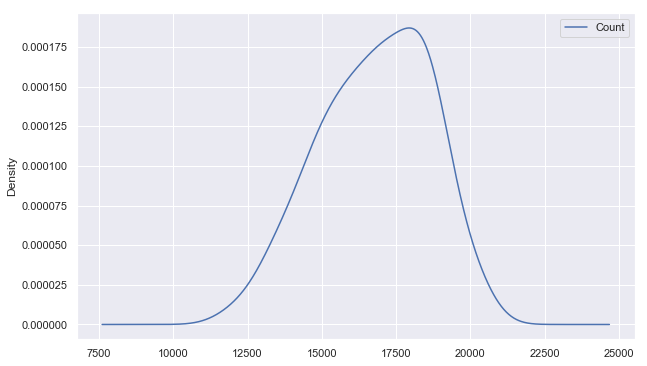

In [23]:
month_count.plot(kind='kde', figsize = (10,6))
plt.show()

In [24]:
url = 'https://www.bls.gov/regions/new-york-new-jersey/data/xg-tables/ro2xglausnyc.htm'
unemployed = pd.read_html(url)

In [25]:
unemployed[7].head().T

,0,1,2,3,4
Year,2009,2010,2011,2012,2013
Jan,7.9,10.5,9.4,10.0,9.9
Feb,8.6,10.3,9.2,10.1,9.4
Mar,8.7,10.0,8.6,9.6,8.7
Apr,8.3,9.5,8.3,8.8,8.2
May,8.9,9.2,8.5,9.2,8.6
Jun,9.5,9.4,9.1,9.7,9.1
Jul,9.9,9.7,9.3,9.9,9.2
Aug,10.0,9.5,9.3,9.4,9.1
Sep,10.0,9.2,9.2,8.7,8.7


In [29]:
columns_toCare = ['X_COORD_CD', 'Y_COORD_CD']
df_date = df_date.dropna(subset=columns_toCare, how='all')

In [31]:
#aggregate locations

#number of grids on x-axis (starting at 1)
resX = 200;
#number of grids on y-axis
resY = 200;

#identify the x,y edges of the data
x_max = df_date['X_COORD_CD'].max()
x_min = df_date['X_COORD_CD'].min()
y_max = df_date['Y_COORD_CD'].max()
y_min = df_date['Y_COORD_CD'].min()

xCoordinate = df_date['X_COORD_CD']
yCoordinate = df_date['Y_COORD_CD']

#distances along x and y axis
rangeX = x_max - x_min
rangeY = y_max - y_min

#linear transformations
kX = (resX-1)/rangeX
cX = x_min*kX -1
newX = round(kX * xCoordinate - cX)
kY = (resY-1)/rangeY
cY = y_min*kY -1
newY = round(kY * yCoordinate - cY)

newX = newX.astype(int)
newY = newY.astype(int)

df_date['New_X_Coor'] = newX
df_date['New_Y_Coor'] = newY

In [ ]:
#make frequency matrix for heat map generation
count  = np.zeros((resX, resY))
for i in range (0,len(newX)):
    x = newX[i] -1
    y = newY[i] -1
    count[x][y] = count[x][y] + 1

In [ ]:
smopy.TILE_SERVER = "http://tile.basemaps.cartocdn.com/light_all/{z}/{x}/{y}@2x.png"
#smopy.TILE_SIZE = 512
latMax = df_date['Latitude'].max()
latMin = df_date['Latitude'].min()
lonMax = df_date['Longitude'].max()
lonMin = df_date['Longitude'].min()
map = smopy.Map((latMin, lonMin, latMax, lonMax))

In [ ]:
x, y = map.to_pixels(df_date['Latitude'], df_date['Longitude'])
ax = map.show_mpl(figsize=(15, 15))
ax.plot(x, y, 'or', ms=1, mew=1);